# Overview

We're now switching focus away from the Network Science, beginning to think about _Text_ instead. In other words, today will be all about learning to parse and make sense of textual data. This ties in nicely with our work on the network of Computational Social Scientists, because papers naturally contain text.

We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Part 1 - Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Part 2 -  Figuring out how to make NLTK to work with real world data (Chapter 3).
* Part 3 - Apply some of the concepts that you have learned to study the abstract dataset

> **_Video Lecture_**. [Intro to Natural Language processing](https://www.youtube.com/watch?v=Ph0EHmFT3n4). Today is all about working with NLTK, so not much lecturing - we will start with a perspective on text analysis by Sune (you will hear him talking about Wikipedia data here and there. Everything he sais applies to other textual data as well!)

#  Part 1 : Installing and the basics

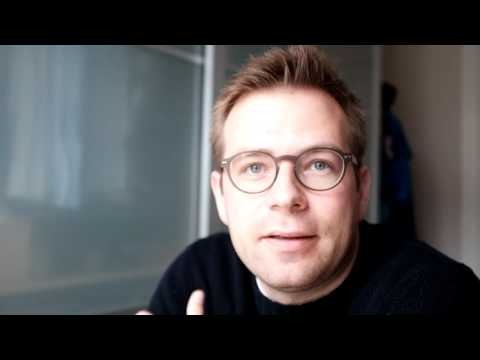

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ph0EHmFT3n4",width=800, height=450)


> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1, Sections 1, 2, 3\. [It's free online](http://www.nltk.org/book/). 


> *Exercises*: NLPP Chapter 1\.
> 
> * First, install `nltk` if it isn't installed already.
> * Second, work through chapter 1. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open IPython Notebook and type out the examples that you see. ***It becomes much more fun if you to add a few variations and see what happens***. Some of those examples might very well be due as assignments, so those ones should definitely be in a `notebook`. 
>     * The following exercises from Chapter 1 are what might be due in an assignment later on.
>     * Try out the `concordance` method, using another text and a word of your own choosing.
>     * Also try out the `similar` and `common_context` methods for a few of your own examples.
>     * Create your own version of a dispersion plot ("your own version" means another text and different word).
>     * Explain in your own words what aspect of language _lexical diversity_ describes. 


# Part 2 - Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about.
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

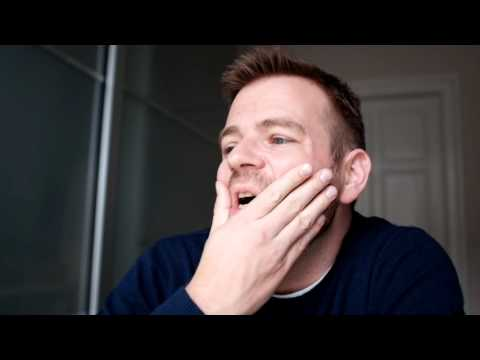

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key thing is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation on  topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).


# Part 3 - Putting things into practice with the abstract dataset


## Prelude to Exercise 1: Some theory on the Zipf's law. 


**Zipf's Law:** Let $f(w)$ be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. The [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type. 


> _Reading_
> Skim through the Wikipedia page on the [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law)

> __Exercise 1: Tokenization and Zipf's Law.__ In this exercise, you will explore tokenization and its relation to Zipf's Law through the abstracts of Computational Social Science papers. Starting with your abstracts dataframe from Week 2, follow the steps below to analyze and process the data.
>
> 1. __Convert Inverted Index to Text.__ Write a function that converts an inverted indexed abstract into plain text. The abstract inverted index is a dictionary. Keys are words and values are lists of indexes. The indexes indicate the positions of the word within the abstract. The function should reconstruct the original abstract in plain text from this inverted index. Then, use the [`pd.apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) method to apply your function to each row in your dataframe, storing the output in a new column named `text`.
>
> 2. __Tokenization.__ Create a column `tokens` in your dataframe to store the tokens from each abstract's text. Remember to adhere to the following guidelines for successful tokenization:
>  - Revisit Chapter 3 if you're unfamiliar with tokenization.
>  - Exclude punctuation, URLs, mathematical symbols, and numbers.
>  - Convert all text to lowercase.
>  - Optional: Consider using stemming.
>  
> 3. __Create a Tokens List.__ Combine the tokens from all abstracts into one comprehensive list.
>
> 4. __Common words.__ Determine and list the 10 most frequent words within your concatenated tokens list.
>
> 5. __Frequency rank plot.__ Write a function to process your list of tokens and plot word frequency against word rank. Use a logarithmic scale for your plot. Reflect on the trend observed, especially at the extremes of the plotted line.
> 6. __Comparison with random words.__ 
>  - Generate a long, random text string using `random.choice("abcdefg ")`, including the space character.
>  - Tokenize this string and generate a Zipf plot, comparing it with your earlier plot.
>  - Share your insights on Zipf's Law based on this comparison.
> 7. __Excluding Stopwords.__
>  - Exclude stopwords from your tokens (review NLPP1e if necessary).
>  - Repeat Steps 2 to 5 with the refined tokens list.
>  - Observe and describe any changes in your findings.


## Prelude to Exercise 2: Some theory on bigrams and contingency tables .

In this course, we use a "bag-of-words" approach, because using simple methods to explore the data is very important before applying any complex model. 
Here, we learn how to account for an issue that often comes up when using a bag-of-words approach when studying textual data. 
[*Collocations*](https://en.wikipedia.org/wiki/Collocation), are *pairs of words that tend to appear together more often than by chance*. It is an important concept in linguistics. 

In the case of collocations, words should be considered together to retain their original meaning (e.g. *machine learning* is not simply *machine* and *learning*. The same applies to *computer science*, *social media*, *computational social science* ).

**How do we find out if a pair of words $w_1, w_2$ appears in a corpus more often than one would expect by chance?** We study the corresponding *contingency table*.
Given a corpus, and two words $w_1$ and $w_2$, the observerd contingency table is a matrix with the following elements:

$$O_{w_1,w_2}= \begin{bmatrix} n_{ii} & n_{io} \\ n_{oi} & n_{oo} \end{bmatrix}$$

$n_{ii}$: the number of times the bigram ($w_1$, $w_2$) appear in the corpus     
$n_{io}$: the number of bigrams ($w_1$, * ), where the first element is $w_1$ and the second element is **not** $w_2$         
$n_{oi}$:  the number of bigrams ( * , $w_2$ ), where the first element is **not** $w_1$ and the second element is $w_2$    
$n_{oo}$: the number of bigrams ( * , * ) where the first element is **not** $w_1$ and the second is **not** $w_2$. 

Then, we can compare the observed number of occurrences of the bigram, $n_{ii}$, with the number of occurrences we would expect simply by random chance.    

If we define: 

$R_{1}=n_{ii}+n_{io}$: the bigrams containing the word $w_1$  (sum of first row)    
$C_{1}=n_{ii}+n_{oi}$: the bigrams containing the word $w_2$ (sum of first column)    
$R_{2}=n_{oi}+n_{oo}$: the bigrams **not** containing the word $w_1$  (sum of second row)    
$C_{2}=n_{io}+n_{oo}$: the bigrams **not** containing the word $w_2$  (sum of second column)    
$N = R_1 + C_1 + R_2 + C_2$: the total number of bigrams

Then, the "expected" contingency table is: 

$$E_{w_1,w_2}= \begin{bmatrix} \frac{R_1C_1}{N} & \frac{R_1C_2}{N} \\ \frac{R_2C_1}{N} & \frac{R_2C_2}{N} \end{bmatrix}$$


We can then check if our bigram ${w_1,w_2}$ appears more than what we would expect by chance by comparing how similar are the values of $O_{w_1,w_2}$ and $E_{w_1,w_2}$. 
A widely used way to do that is to use a [Chi-Squared test](https://en.wikipedia.org/wiki/Chi-squared_test).


> **Exercise 2: Bigrams and contingency tables**. 
> 1. Find the list of bigrams in each of the abstracts. If you don't remember how to do it, go back to [Chapter 1](http://www.nltk.org/book/) of your book. Store all the bigrams in a single list. __Important__: here you shall work with the clean set of tokens you have generated in the exercise above (after removing punctuation, **stopwords**, digits, math symbols, etc).    
>    
> 2. For each unique bigram in your list:
>   - compute the corresponding *contingency table* (see the theory just above)
>   - compute the expected *contingency table* (see the theory just above) 
>
> 3. For each unique bigram, compute the Chi-squared statistics: $X^2 = \sum_{ij}\frac{(O_{ij} - E_{ij})^2}{E_{ij}}$, where $O_{ij}$ and $E_{ij}$ are the elements of the observed and expected matrix, respectively. 
> 4. Compute the p-value associated to each Chi-squared statistics. The p-value is nothing but the survival function (1 - cumulative distribution function) of the [Chi-squared distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html). Hence, you can simply compute it as: ``scipy.stats.chi2.sf(X^2,df=1)`` because in this case we have 1 degree of freedom (df=1).  
> 5. Find the list of bigrams that appear more than 50 times and have p-value smaller than 0.001. We refer to those as __collocations__. 
> 6. How many collocations have you found? Print out the top 20 of them by number of occurrences. What do you observe? What kind of bigrams does this list include? 
> 7. Recompute the __tokens__ column in your dataframe. This time, do not split pairs of words that constitute a collocation (from now on we consider those two words as a single "token"). **Hint:** You can use the [MWETokenizer](https://www.nltk.org/_modules/nltk/tokenize/mwe.html). 
> 8. Save your abstract dataframe with the new __tokens__ column.